In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [32]:
# Read in the image and print some stats
image = mpimg.imread('test.jpg')
print('This image is: ', type(image), 
         'with dimesions:', image.shape)

('This image is: ', <type 'numpy.ndarray'>, 'with dimesions:', (540, 960, 3))


In [33]:
# Pull out the x and y sizes and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)
print region_select.shape

(540, 960, 3)


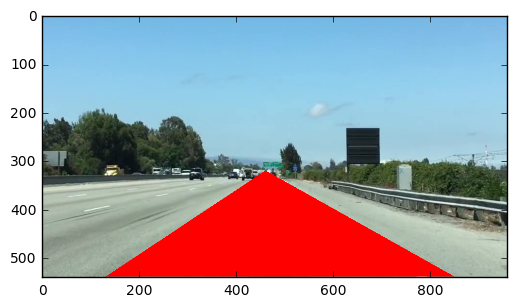

In [34]:
# Define a triangle region of interest 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz 
left_bottom = [130, 539]
right_bottom = [850, 539]
apex = [460, 320]

# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0],apex[0]),(left_bottom[1],apex[1]),1)
fit_right = np.polyfit((right_bottom[0],apex[0]),(right_bottom[1],apex[1]),1)
fit_bottom = np.polyfit((left_bottom[0],right_bottom[0]),(left_bottom[1],right_bottom[1]),1)

# find the region inside the lines
# create the mesh grid 

# To understand meshgrid, look here: http://stackoverflow.com/questions/36013063/what-is-purpose-of-meshgrid-in-python

XX, YY = np.meshgrid(np.arange(0,xsize),np.arange(0,ysize))

region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
# 
region_select[region_thresholds]=[255,0,0]
plt.imshow(region_select)
plt.show()
